## Maschinelles Lernen SoSe 2022

### Praktikum 7 - Alexnet Classification

In [171]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import numpy as np
import tensorflow as tf

import cv2

from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [172]:
# from sklearn.model_selection import train_test_split

# filesFolder =  '../wangCustom10'
# fileToLabelDict = {}

# x_data = []
# y_data = []

# for root, directories, files in os.walk(filesFolder, topdown=False):
#     for name in files:
#         if "readme" not in name:
#             eachFilePath = os.path.join(root, name)
#             labelName = os.path.basename(os.path.normpath(root))
#             image = cv2.imread(eachFilePath, cv2.IMREAD_UNCHANGED)

#             if (image.shape[0] == 256):
#                 image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE);        

#             # x_data.append(np.array(image).flatten())
#             x_data.append(np.array(image))
#             y_data.append(labelName)



# x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size = 0.5)

In [173]:
path = "../wangCustom10"

img_width = 384
# img_width = 300
img_height = 256
# img_height = 200
input_shape = img_width, img_height, 3
batch_size = 16

# classNames = ["alaska", "antiques", "balloons", "cats", "crystal", "elephants", "horses", "mushroom", "orchid", "vegtable"]

train_dataset = tf.keras.utils.image_dataset_from_directory(
    path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    labels="inferred",
    subset="training",
    validation_split=0.1,
    seed=4326,
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    labels="inferred",
    subset="validation",
    validation_split=0.1,
    seed=4326,
)

class_names = train_dataset.class_names
print(class_names)


Found 999 files belonging to 10 classes.
Using 900 files for training.
Found 999 files belonging to 10 classes.
Using 99 files for validation.
['alaska', 'antiques', 'balloon', 'cats', 'crystal', 'elephants', 'horses', 'mushroom', 'orchid', 'vegtable']


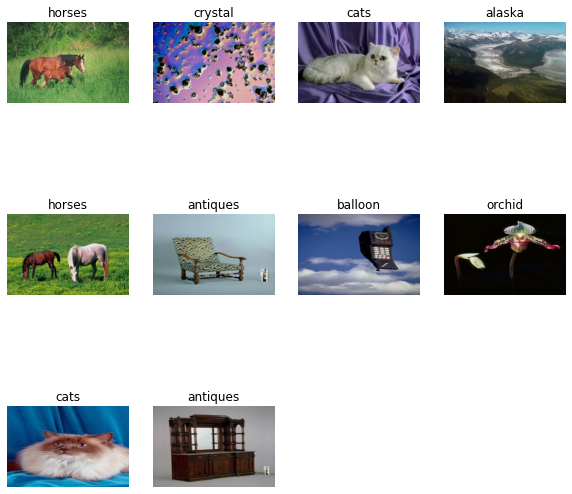

In [174]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(10):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [175]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [176]:
num_classes = len(class_names)

print(num_classes)

data_augmentation = keras.Sequential(
    [
        tf.keras.layers.RandomFlip(
            "horizontal", input_shape=(img_height, img_width, 3)
        ),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
    ]
)

# Create a sequential model
model = Sequential()

model.add(data_augmentation)
# 1st Convolutional Layer
model.add(
    Conv2D(
        filters=96,
        input_shape=(img_height, img_width, 3),
        kernel_size=(11, 11),
        strides=(4, 4),
        padding="valid",
    )
)
model.add(Activation("relu"))
# Pooling
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11, 11), strides=(1, 1), padding="valid"))
model.add(Activation("relu"))
# Pooling
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding="valid"))
model.add(Activation("relu"))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding="valid"))
model.add(Activation("relu"))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding="valid"))
model.add(Activation("relu"))
# Pooling
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(500 * 500 * 3,)))
model.add(Activation("relu"))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation("relu"))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation("relu"))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(num_classes))
model.add(Activation("softmax"))

model.summary()


10
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 256, 384, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 62, 94, 96)        34944     
                                                                 
 activation_27 (Activation)  (None, 62, 94, 96)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 31, 47, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_24 (Bat  (None, 31, 47, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 21, 37, 256)   

In [177]:
# Compile
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)


In [178]:
# Train
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

epochs=100
hist = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    verbose=1,
)

Epoch 1/100


c:\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


57/57 [==============================] - 13s 201ms/step - loss: 2.7362 - accuracy: 0.2222 - val_loss: 744.9904 - val_accuracy: 0.1111
Epoch 2/100
57/57 [==============================] - 10s 178ms/step - loss: 2.1859 - accuracy: 0.3000 - val_loss: 31.3789 - val_accuracy: 0.1717
Epoch 3/100
57/57 [==============================] - 4s 61ms/step - loss: 2.0908 - accuracy: 0.3500 - val_loss: 5.3623 - val_accuracy: 0.3333
Epoch 4/100
57/57 [==============================] - 3s 52ms/step - loss: 1.9433 - accuracy: 0.3622 - val_loss: 8.8417 - val_accuracy: 0.2424
Epoch 5/100
57/57 [==============================] - 3s 52ms/step - loss: 1.8252 - accuracy: 0.4333 - val_loss: 2.4954 - val_accuracy: 0.5152
Epoch 6/100
57/57 [==============================] - 3s 53ms/step - loss: 1.6488 - accuracy: 0.4722 - val_loss: 3.6319 - val_accuracy: 0.4545
Epoch 7/100
57/57 [==============================] - 3s 55ms/step - loss: 1.5977 - accuracy: 0.4656 - val_loss: 2.0768 - val_accuracy: 0.5859
Epoch 8/100

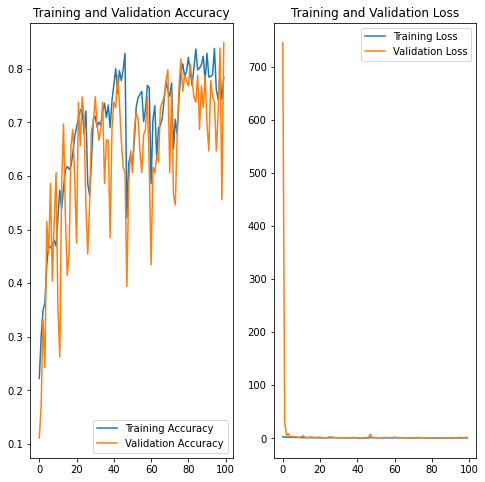

In [179]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [180]:
test_path = "../wangCustom10/vegtable/169003.jpg"

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

print(img_array.shape)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

(1, 256, 384, 3)
This image most likely belongs to vegtable with a 23.20 percent confidence.


In [181]:
# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf

y_true = []
y_pred = []
for x, y in validation_dataset:
    y_true.append(y)
    y_pred.append(np.argmax(model.predict(x), axis=1))

y_pred = tf.concat(y_pred, axis=0)
y_true = tf.concat(y_true, axis=0)

print("Confusion Matrix")
matrix = confusion_matrix(y_true, y_pred)
print(matrix)
print("Classification Report")
print(y_pred.shape)
print(classification_report(y_true, y_pred, target_names=class_names))


Confusion Matrix
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  1  0  0  0  0  0  0]
 [ 0  0  4  1  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  1  0 10  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  2  0  0  0 11  2  0]
 [ 0  0  0  1  0  0  0  1 11  0]
 [ 0  0  1  0  1  0  2  1  1  2]]
Classification Report
(99,)
              precision    recall  f1-score   support

      alaska       1.00      1.00      1.00         8
    antiques       1.00      0.93      0.96        14
     balloon       0.67      0.80      0.73         5
        cats       0.69      1.00      0.81        11
     crystal       0.91      0.91      0.91        11
   elephants       1.00      1.00      1.00         7
      horses       0.78      1.00      0.88         7
    mushroom       0.85      0.73      0.79        15
      orchid       0.79      0.85      0.81        13
    vegtable       1.00      0.25      0.40         8

    accuracy                

In [182]:
from keras.utils.np_utils import to_categorical 

# Wrong predictions

false_predictions = []
correct_predictions = []

# print(len(validation_dataset))

prediction_labels = []
true_labels = []

for image, label in validation_dataset.unbatch():
    img_data = tf.expand_dims(image, 0)
    pred = model.predict(img_data).flatten()

    # prediction_labels.append(model.predict(img_data))
    # true_labels.append([np.round(label)])


    label_onehot = to_categorical(label, num_classes)

    if (np.array_equal(label_onehot,np.round(pred))):
        correct_predictions.append(img_data)
    else:
        false_predictions.append(img_data)

print("False predictions: " + len(false_predictions))
print("Correct predictions: " + len(correct_predictions))

print(false_predictions[0].shape)



TypeError: can only concatenate str (not "int") to str

False predictions


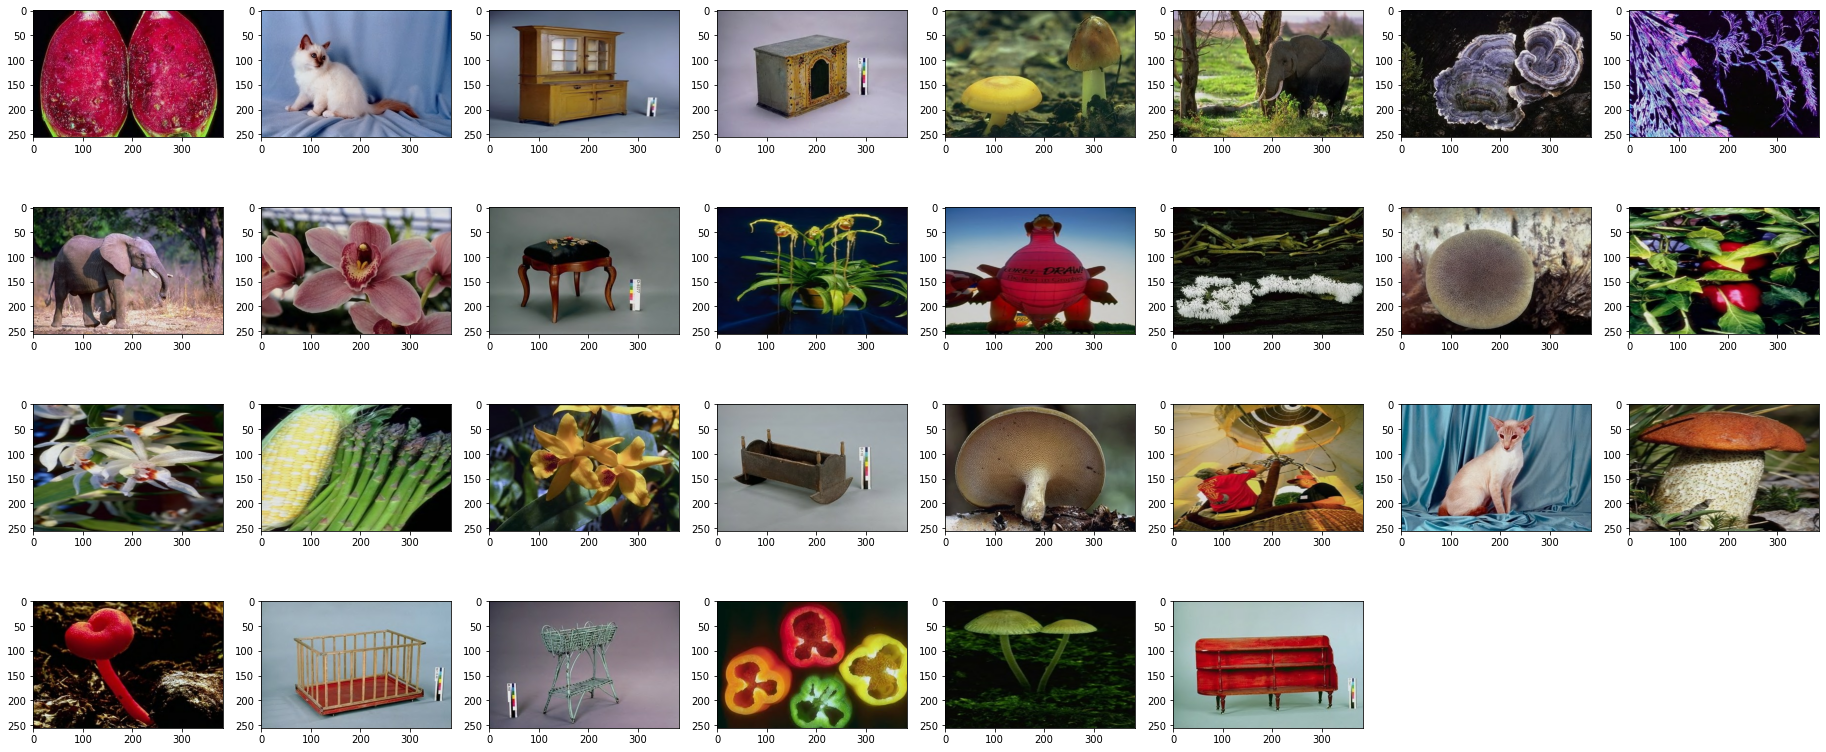

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

columns = 8

false_predictions_fig = plt.figure(figsize=(32, 32))

total_false_predictions = len(false_predictions)

print("False predictions")
false_predictions_rows = total_false_predictions // columns 
false_predictions_rows += total_false_predictions % columns
for i, eachFalsePredictionImg in enumerate(false_predictions):
    img = np.array(eachFalsePredictionImg).reshape(256, 384, 3)
    false_predictions_fig.add_subplot(false_predictions_rows, columns, i+1)
    plt.imshow(img.astype(np.uint8))
plt.show()

Correct predictions


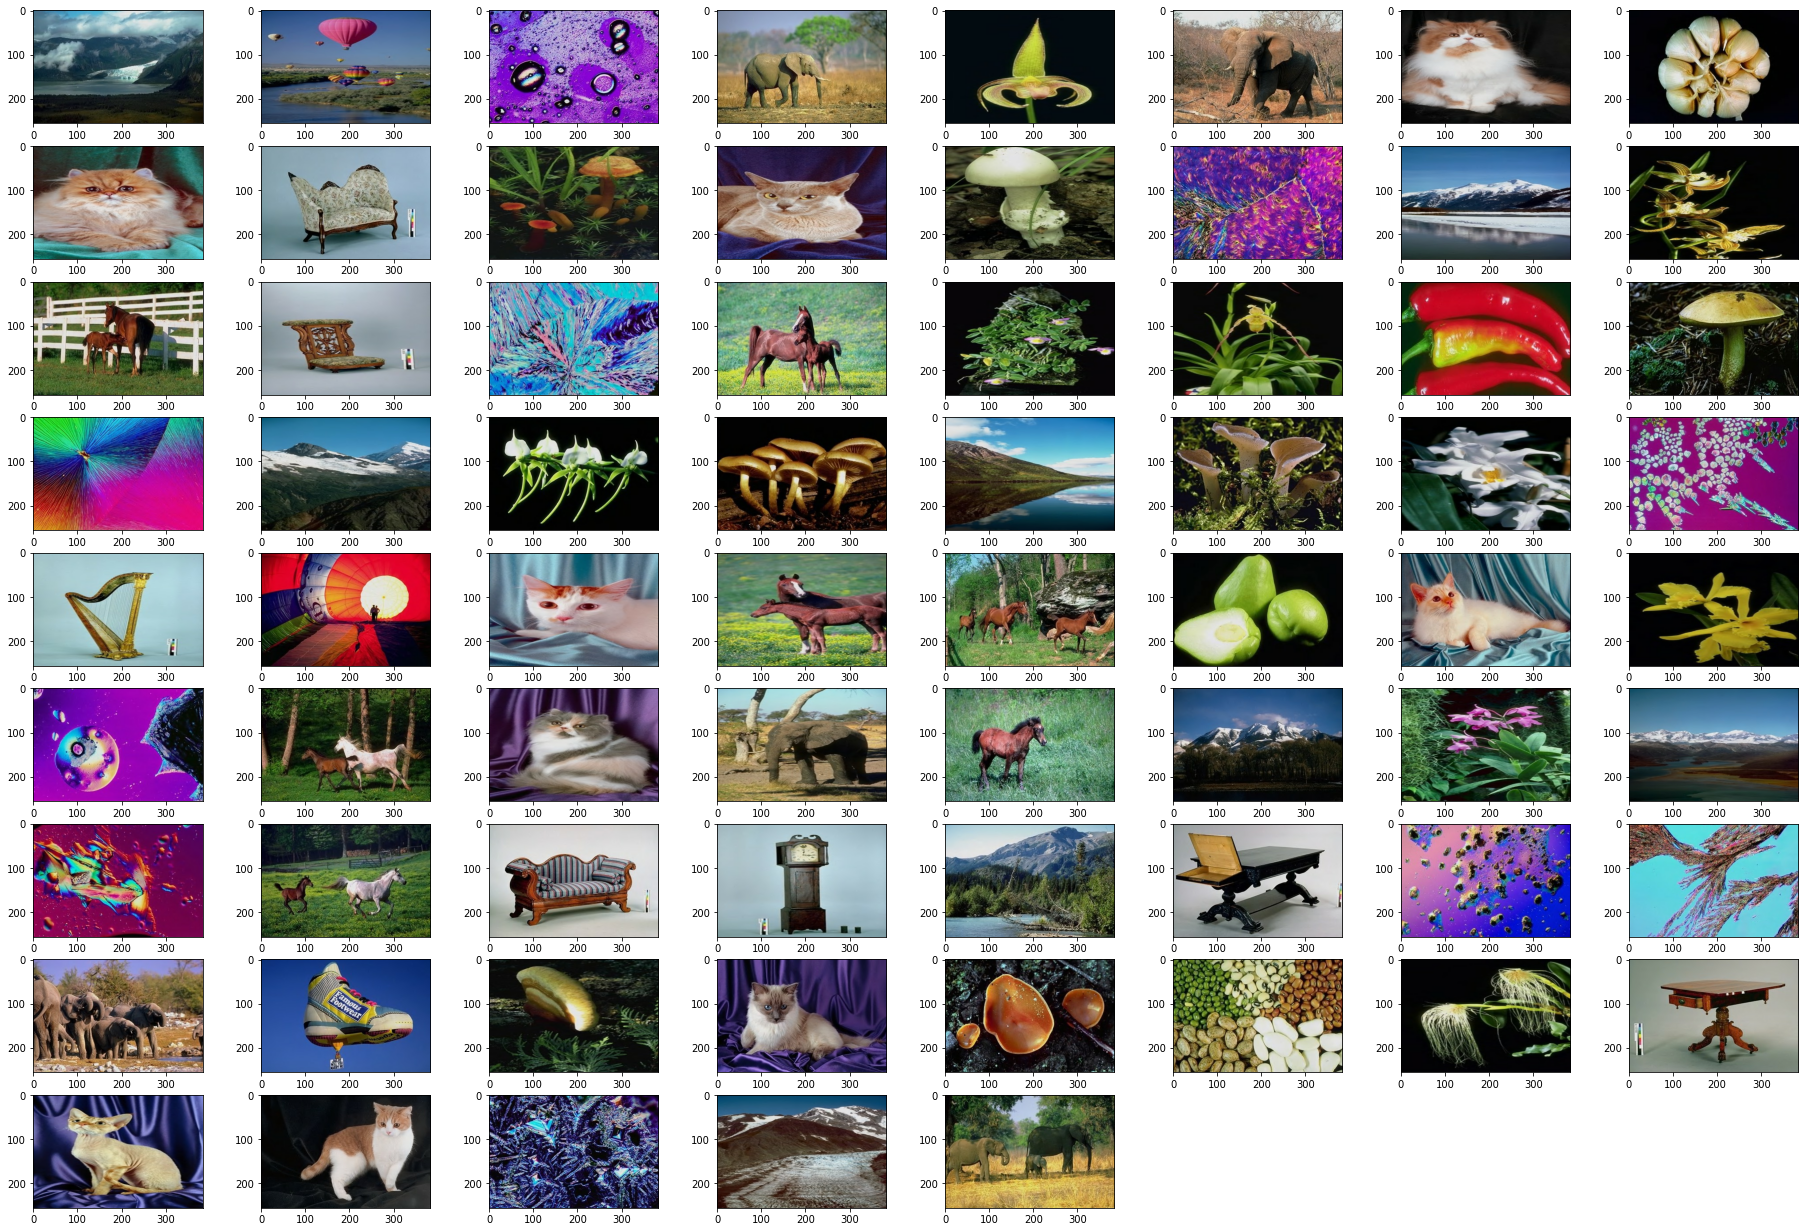

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

correct_predictions_fig = plt.figure(figsize=(32, 32))

total_correct_predictions= len(correct_predictions)

print("Correct predictions")
correct_predictions_columns = 8
correct_predictions_rows = total_correct_predictions // columns 
correct_predictions_rows += total_correct_predictions % columns
for i, eachCorrectPredictionImg in enumerate(correct_predictions):
    img = np.array(eachCorrectPredictionImg).reshape(256, 384, 3)
    correct_predictions_fig.add_subplot(correct_predictions_rows, columns, i+1)
    plt.imshow(img.astype(np.uint8))
plt.show()

In [ ]:
print("Evaluate")
result = model.evaluate(validation_dataset)
dict(zip(model.metrics_names, result))

Evaluate
7/7 [==============================] - 0s 18ms/step - loss: 1.0014 - accuracy: 0.7172


{'loss': 1.0013636350631714, 'accuracy': 0.7171717286109924}